# Load Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/dataKBK.csv')
df.head()

,id,judul,abstrak,kbk
0,1,<p>Pengembangan Sistem Pendukung Keputusan unt...,<p>Sistem Pendukung Keputusan (SPK) merupakan ...,Pengembangan Aplikasi dan Media Pembelajaran T...
1,3,<p>HUBUNGAN EFIKASI DIRI DENGAN KESIAPAN KERJA...,"<p>Pandemi covid-19 yang melanda dunia, teruta...",Ketenegakerjaan Teknologi dan Kejuruan
2,4,<p>Alat Bantu Penyandang Tunanetra Berbasis De...,<p>Tujuan dilakukannya penelitian ini untuk me...,Biomedic and Intelligent Assistive Technology ...
3,6,"<p class=""MsoNormal"" style=""margin-left:35.45p...","<p><span style=""font-size:12.0pt;line-height:1...",Intelligent Power Electronics and Smart Grid (...
4,7,"<p class=""MsoNormal"" align=""center"" style=""tex...","<p class=""MsoNormal"" style=""text-align:justify...",Pengembangan Aplikasi dan Media Pembelajaran T...


# Data Exploration

In [2]:
# Jumlah baris pada dataset
len(df)

2164

In [3]:
# Jumlah data pada masing-masing label KBK
df['kbk'].value_counts()

Pengembangan Aplikasi dan Media Pembelajaran Teknologi dan Kejuruan              463
Strategi Pembelajaran Teknologi dan Kejuruan                                     395
Kurikulum Pendidikan Teknologi dan Kejuruan                                      200
Rekayasa pengetahuan dan ilmu data (Knowledge Engineering and Data Science)      174
Evaluasi dan Pengelolaan Pendidikan Kejuruan                                     155
Ketenegakerjaan Teknologi dan Kejuruan                                           142
Teknologi Digital Cerdas (Ubiquitous Computing Technique)                        132
Intelligent Power and Advanced energy System (IPAES)                             121
Intelligent Power Electronics and Smart Grid (IPESG)                             104
Telematics loT System and Devices                                                 90
Game Technology and Machine Learning Applications                                 88
Biomedic and Intelligent Assistive Technology (TAT)              

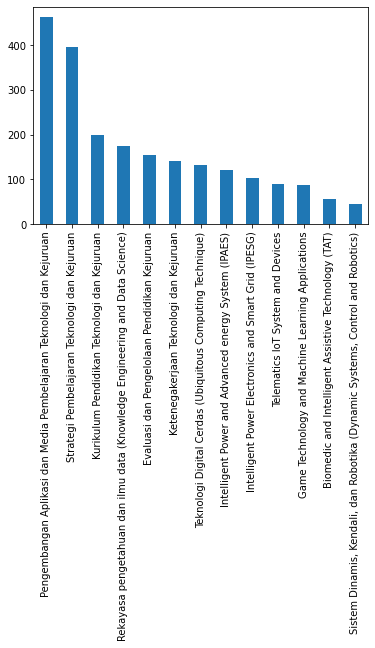

In [5]:
import matplotlib.pyplot as plt

df['kbk'].value_counts().plot(kind='bar')
plt.show()

# Text Preprocessing

## Text Cleaning

In [4]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

df['judul'] = df['judul'].apply(lambda x: cleaning(x))
df['abstrak'] = df['abstrak'].apply(lambda x: cleaning(x))

df.head()

,id,judul,abstrak,kbk
0,1,pengembangan sistem pendukung keputusan untuk ...,sistem pendukung keputusan spk merupakan suatu...,Pengembangan Aplikasi dan Media Pembelajaran T...
1,3,hubungan efikasi diri dengan kesiapan kerja lu...,pandemi covid 19 yang melanda dunia terutama i...,Ketenegakerjaan Teknologi dan Kejuruan
2,4,alat bantu penyandang tuetra berbasis deteksi ...,tujuan dilakukannya penelitian ini untuk memba...,Biomedic and Intelligent Assistive Technology ...
3,6,analisis thermovisi penghantar akibat transmis...,gardu induk waru merupakan sub transmisi listr...,Intelligent Power Electronics and Smart Grid (...
4,7,pengembangan modulberbasis production based ed...,mata pelajaran dasar desain grafis merupakan m...,Pengembangan Aplikasi dan Media Pembelajaran T...


In [5]:
# Checkpoint: Export Hasil Text Cleaning
df.to_csv('text-cleaning.csv')

## Remove Missing Values

In [6]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [7]:
# Cek missing values
df.isnull().sum()

id           0
judul        4
abstrak    896
kbk          0
dtype: int64

In [8]:
# Remove missing values
df.dropna(inplace=True)
len(df)

1266

## Remove Duplicate Values

In [9]:
# Cek apakah terdapat duplikasi data pada kolom judul
df[df['judul'].duplicated()]

,id,judul,abstrak,kbk
1243,1277,pengembangan sistem pendukung keputusan untuk ...,proses penentuan dosen pembimbing skripsi atau...,Game Technology and Machine Learning Applications


In [10]:
# Remove duplicates judul
df.drop_duplicates(subset=['judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['judul'].duplicated()]

,id,judul,abstrak,kbk


In [11]:
# Cek apakah terdapat duplikasi data pada kolom abstrak
df[df['abstrak'].duplicated()]

,id,judul,abstrak,kbk
259,275,pengembangan alat peraga pemindah barang berba...,industri dan perkembangannya tentu tidak lepas...,Pengembangan Aplikasi dan Media Pembelajaran T...


In [12]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['abstrak'].duplicated()]

,id,judul,abstrak,kbk


In [13]:
# Checkpoint: Export Hasil Preprocessing
df.to_csv('preprocessed-data.csv')

## Tokenization

In [14]:
from nltk.tokenize import word_tokenize

# Tokenizing Judul
df['judul_tokens'] = df['judul'].apply(lambda x: word_tokenize(x))
df['judul_tokens']

0       [pengembangan, sistem, pendukung, keputusan, u...
1       [hubungan, efikasi, diri, dengan, kesiapan, ke...
2       [alat, bantu, penyandang, tuetra, berbasis, de...
3       [analisis, thermovisi, penghantar, akibat, tra...
4       [pengembangan, modulberbasis, production, base...
                              ...                        
2159    [pengaruh, status, sosial, ekonomi, orang, tua...
2160    [pengaruh, self, efficacy, dan, mastery, exper...
2161    [rancangan, alat, sistem, otomatis, serta, mon...
2162    [pengembangan, modul, mata, pelajaran, instrum...
2163    [peningkatan, kompetensi, instalasi, peneranga...
Name: judul_tokens, Length: 1264, dtype: object

In [15]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['abstrak'].apply(lambda x: word_tokenize(x))
df['abstrak_tokens']

0       [sistem, pendukung, keputusan, spk, merupakan,...
1       [pandemi, covid, 19, yang, melanda, dunia, ter...
2       [tujuan, dilakukannya, penelitian, ini, untuk,...
3       [gardu, induk, waru, merupakan, sub, transmisi...
4       [mata, pelajaran, dasar, desain, grafis, merup...
                              ...                        
2159    [penelitian, ini, dilaksanakan, untuk, mengeta...
2160    [aspek, aspek, yang, berpengaruh, dengan, kema...
2161    [perubahan, zaman, ke, era, otomatisasi, merup...
2162    [kementrian, pendidikan, kebudayaan, riset, da...
2163    [latar, belakang, dilakukannya, penelitian, ti...
Name: abstrak_tokens, Length: 1264, dtype: object

## Stop Words Removal

In [16]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

df[["judul", "judul_tokens"]].head()

0       [sistem, pendukung, keputusan, spk, sistem, me...
1       [pandemi, covid, 19, melanda, dunia, indonesia...
2       [tujuan, dilakukannya, penelitian, membantu, p...
3       [gardu, induk, waru, sub, transmisi, listrik, ...
4       [mata, pelajaran, dasar, desain, grafis, mata,...
                              ...                        
2159    [penelitian, dilaksanakan, pengaruh, status, s...
2160    [aspek, aspek, berpengaruh, kemantapan, pengam...
2161    [perubahan, zaman, era, otomatisasi, langkah, ...
2162    [kementrian, pendidikan, kebudayaan, riset, te...
2163    [latar, dilakukannya, penelitian, tindakan, ke...
Name: abstrak_tokens, Length: 1264, dtype: object

In [ ]:
df[["abstrak", "abstrak_tokens"]].head()

## Stemming

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemming judul
df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

c:\Users\ASUS\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 1264/1264 [03:21<00:00,  6.29it/s]


In [18]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

100%|██████████| 1264/1264 [13:21<00:00,  1.58it/s] 


## Export Cleaned Data

In [19]:
df['judul_tokens'] = df['judul_tokens'].apply(lambda x: ' '.join(x))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('cleaned-data-kbk.csv')